In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append('C:/Users/felipe/Documents/Brain/') 

In [3]:
import catboost as cb
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class CatBoostRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="CatBoost"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
                
        self.model_ml= cb.CatBoostRegressor
        self.params = {
            'loss_function': 'RMSE',  
            'eval_metric': 'RMSE'  
        }
        
        self.params_space = {
            'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
            'depth': Integer(3, 10),
            'n_estimators': Integer(50, 5000),
            'l2_leaf_reg': Real(1, 20)
        }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}/Brain_Age/CatBoost/'
file_name = 'Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

cat_model = CatBoostRegressor()
cat_model.set_data(X,y)

cat_model.fit_params_search = {
                "early_stopping_rounds": 200
            }

In [5]:
cat_model.model_params_search = {'task_type':'GPU',
                               'devices':'0'}

# Busqueda Hiperparametros

In [ ]:
opt_cat, best_params_cat = cat_model.SearchBestModel( n_iter_=400, early_stop=True, save_result=True)


In [ ]:
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/CatBoost/Modelos/opt_CAT_model_400iter.pickle', 'wb') as file:
#        pickle.dump(opt_cat, file)

In [5]:
with open('C:/Users/felipe/Documents/Brain/Opt_Model/opt_CAT_model_all_features.pickle', 'rb') as file:
    opt_cat = pickle.load(file)

In [ ]:
resultados = opt_cat.cv_results_
cat_model.guardar_resultados_busqueda(resultados=resultados)

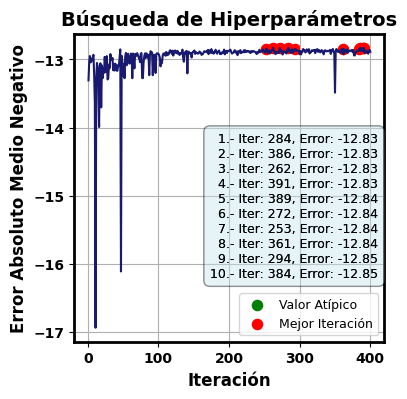

Top 1: Iteración 284, Error -12.82880285876827
Top 2: Iteración 386, Error -12.830888970137877
Top 3: Iteración 262, Error -12.83194426710837
Top 4: Iteración 391, Error -12.834753742165043
Top 5: Iteración 389, Error -12.836099775517834
Top 6: Iteración 272, Error -12.838175372229376
Top 7: Iteración 253, Error -12.841842219812879
Top 8: Iteración 361, Error -12.841855286727277
Top 9: Iteración 294, Error -12.846736053671943
Top 10: Iteración 384, Error -12.847054061973363


In [6]:
cat_model.plot_search_best_model(opt_cat, linewidth=1.5, color='midnightblue')

In [7]:
best_params_cat = cat_model.best_hyper(opt_cat)

In [8]:
best_params_cat

[{'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.020715300063911528,
  'n_estimators': 1334},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.02178344347043209,
  'n_estimators': 1426},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.023196443122432554,
  'n_estimators': 1318},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.02304305413641505,
  'n_estimators': 1425},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.022272607533864758,
  'n_estimators': 1425},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.020848151236542024,
  'n_estimators': 1335},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.023333095861726345,
  'n_estimators': 1313},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.020839484054203734,
  'n_estimators': 1432},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.0217830245635277,
  'n_estimators': 1413},
 {'depth': 7,
  'l2_leaf_reg': 20.0,
  'learning_rate': 0.021511830643817856,

# Trainer

In [ ]:
results, best_model_results, best_model = cat_model.trainer(params_=best_params_cat[0])

In [ ]:
#with open('C:/Users/felipe/Documents/Opt_Model/BestModel_CAT_all_features.pickle', 'wb') as file:
#    pickle.dump(best_model, file)
#with open('C:/Users/felipe/Documents/Opt_Model/results_CAT_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)

In [6]:
with open(f'{path}Memoria_Edad_Cerebral/Opt_Model/BestModel_CAT_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Memoria_Edad_Cerebral/Opt_Model/results_CAT_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

In [7]:
cat_model.model=model

In [8]:
y_pred = cat_model.predicter(X_test=cat_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           6.31e-38
Time:                        20:07:30   Log-Likelihood:                -1003.4
No. Observations:                 276   AIC:                             2011.
Df Residuals:                     274   BIC:                             2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2402      1.417     20.628      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


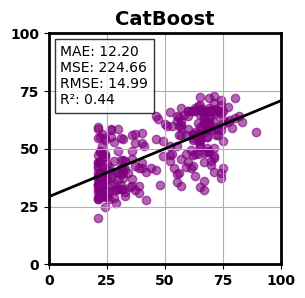

Error medio absoluto: 12.202098013590232
Error cuadrático medio: 224.6640666635065
Raíz del error cuadrático medio: 14.988798039319446
Coeficiente de determinación (R²): 0.44487270444245675


In [9]:
cat_model.plot_regresion(x=cat_model.y_test, y= y_pred, x_size=3,y_size=3,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100,x_min_limit=0,y_min_limit=0, title='CatBoost',label=False,color='purple', color_line_fit="black", line_ideal=False, confidence_interval=False, legend=False,alpha=0.6)

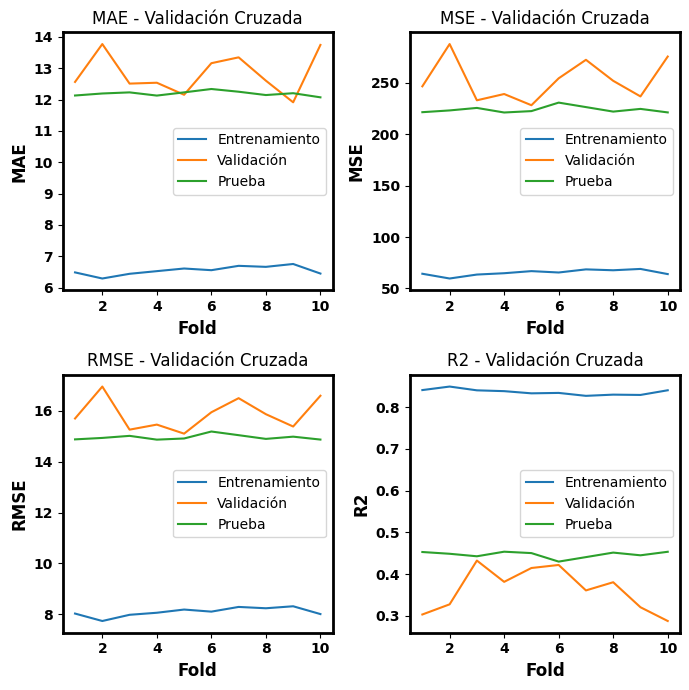

In [13]:
cat_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     228.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           6.31e-38
Time:                        20:07:59   Log-Likelihood:                -1003.4
No. Observations:                 276   AIC:                             2011.
Df Residuals:                     274   BIC:                             2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2402      1.417     20.628      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


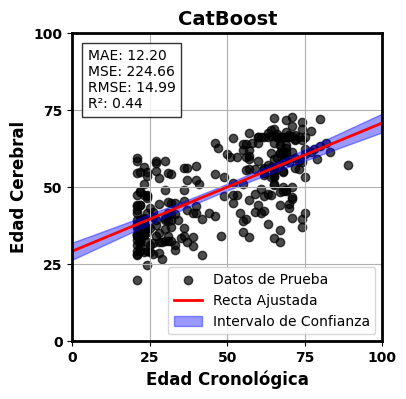

Error medio absoluto: 12.202098013590232
Error cuadrático medio: 224.6640666635065
Raíz del error cuadrático medio: 14.988798039319446
Coeficiente de determinación (R²): 0.44487270444245675


In [10]:
cat_model.plot_regresion(x= cat_model.y_test, y=y_pred,label_='Datos de Prueba', x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, color='black', title='CatBoost',line_ideal=False, confidence_interval=True,  alpha=0.7,xlabel='Edad Cronológica',ylabel='Edad Cerebral',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [15]:
shap_values, shap_sumary_sorted = cat_model.feature_importance_shap(X_test = cat_model.X_test, model = cat_model.model)

Importancia de características basada en suma de valores SHAP:
IAF_OCC_left: 555.8490684469898
IAF_OCC_right: 493.81029981266573
Low_subj_spec_EPP_OCC_right: 491.99778907553167
High_subj_spec_RPD_CING_right: 341.69257693036855
High_subj_spec_EPP_CING_right: 297.6926050713833
Low_subj_spec_EPP_CING_left: 241.7825200787071
Low_subj_spec_EPP_PARIET_right: 218.2328955320252
Low_subj_spec_RPD_OCC_left: 199.73143047772754
IAF_INS_left: 199.33174035787704
Alpha2_canon_RPD_CING_right: 175.5832073700623
Low_subj_spec_RPD_HPC_left: 170.6913912251555
Low_subj_spec_RPD_CING_right: 167.07988795024303
Low_subj_spec_EPP_PARIET_left: 145.56881166071747
Alpha2_canon_RPD_HPC_left: 133.00174678635682
Alpha2_canon_EPP_HPC_left: 125.80351192156424
Alpha2_canon_EPP_PARIET_left: 108.67344778857317
High_subj_spec_EPP_HPC_left: 107.35251244922277
High_subj_spec_RPD_HPC_left: 102.54325415497183
Low_subj_spec_RPD_CING_left: 97.85907658704618
High_subj_spec_EPP_PARIET_right: 97.07357149290874
High_subj_spec_RPD_C

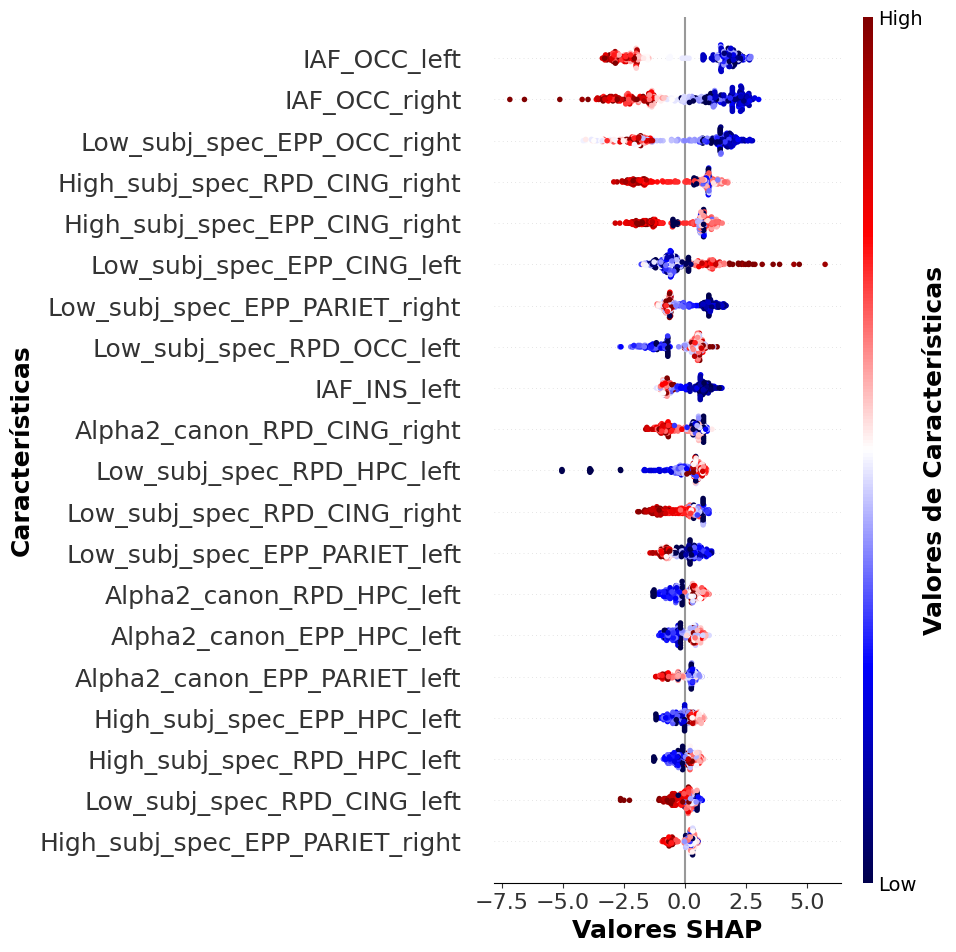

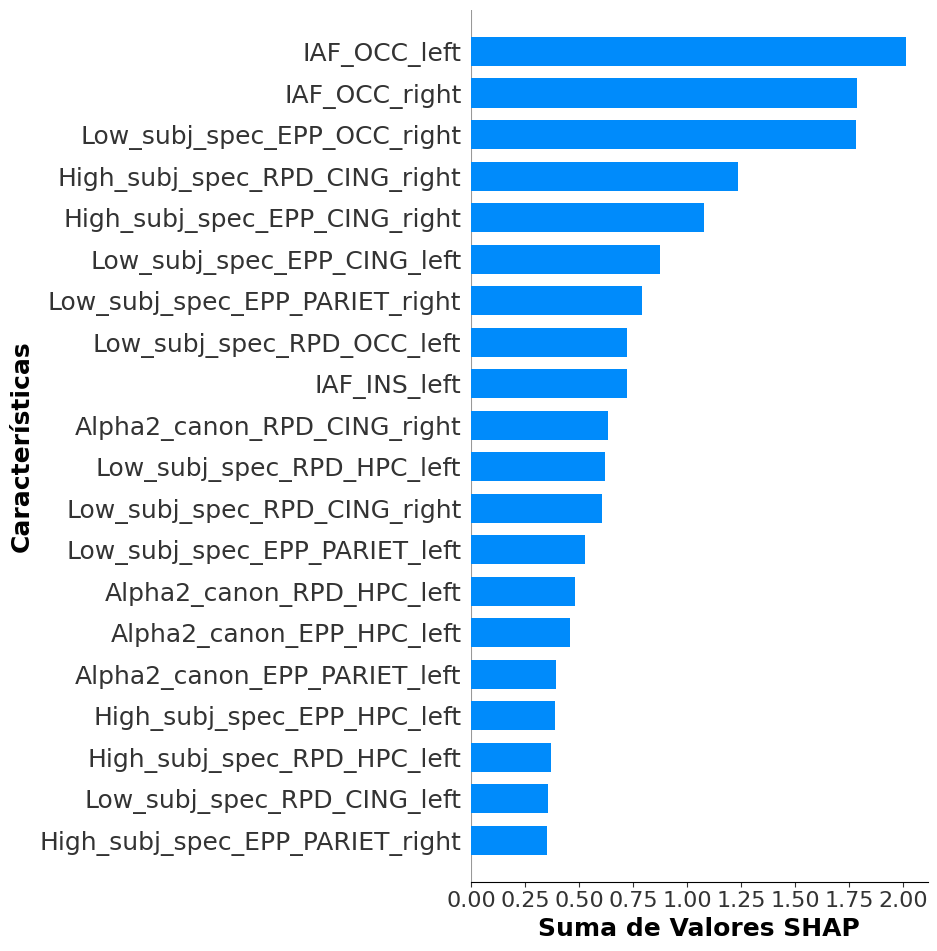

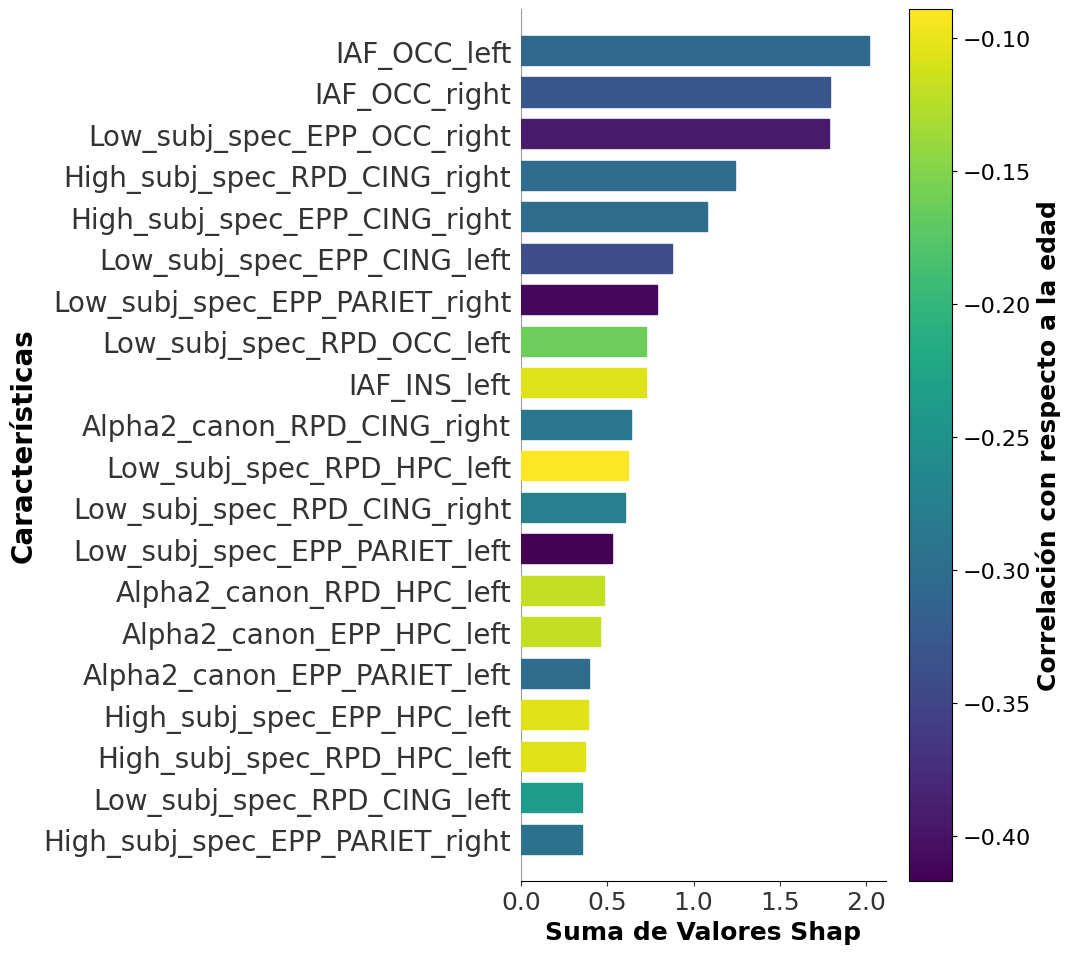

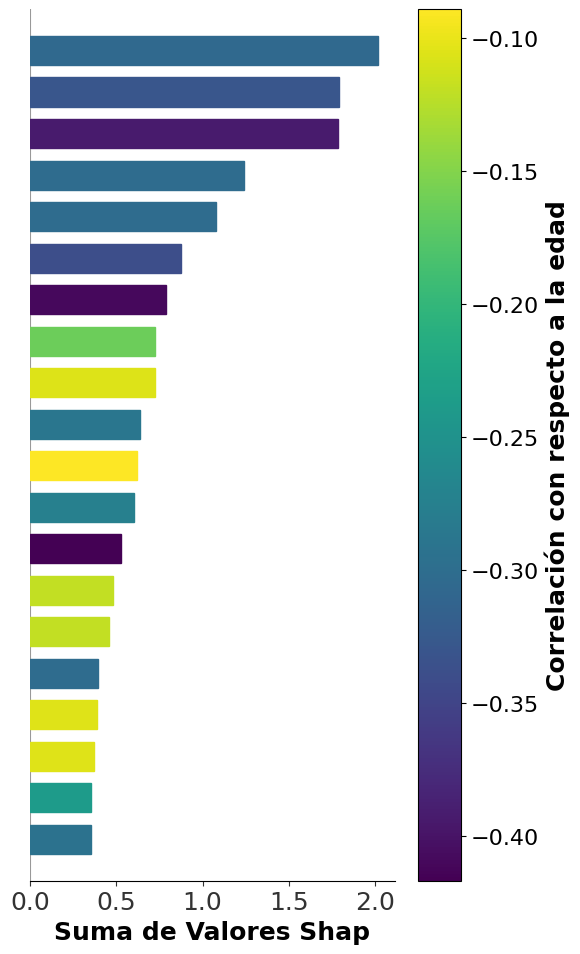

In [51]:
cat_model.plot_feature_importance(shap_values=shap_values,X_test=cat_model.X_test,y_test=cat_model.y_test)

In [12]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_cat.pickle', 'wb') as file:
        pickle.dump(shap_sumary_sorted, file)

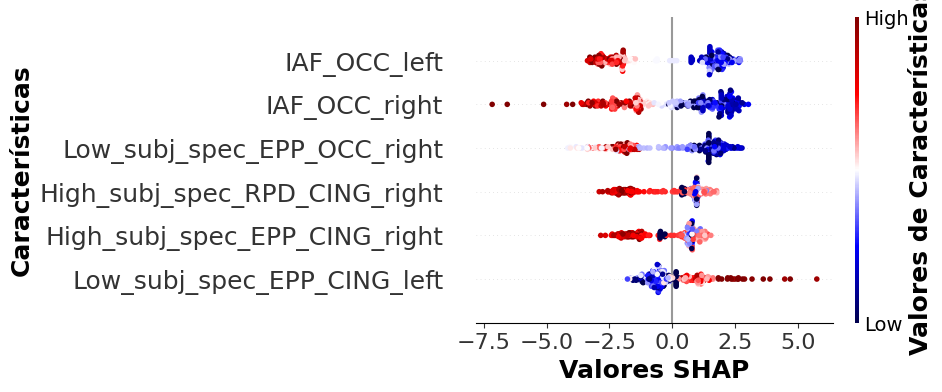

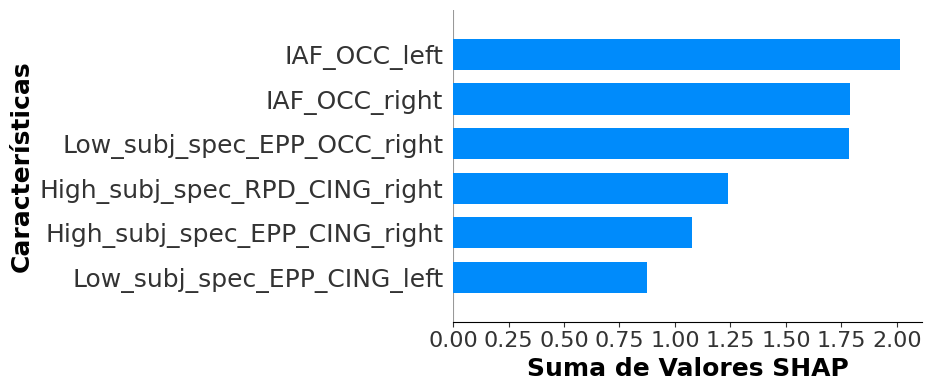

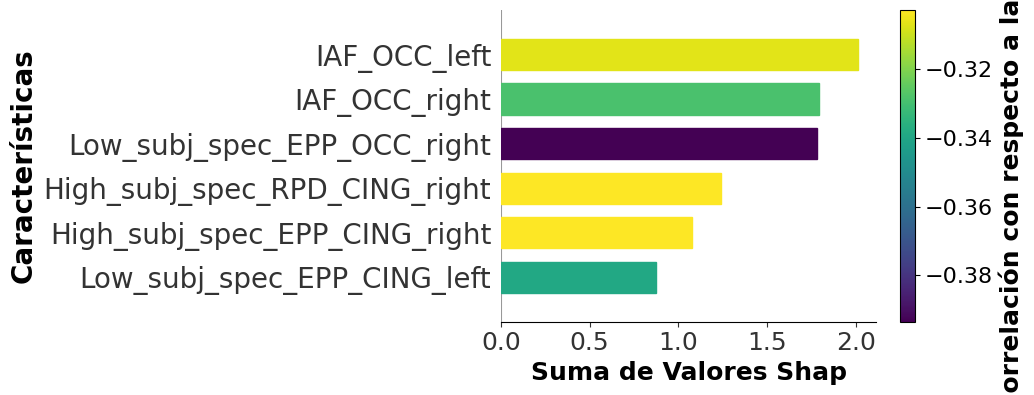

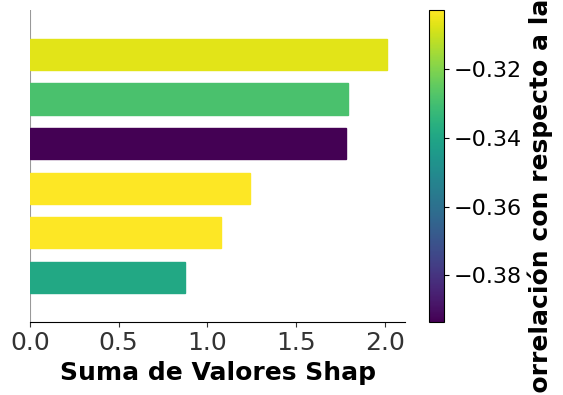

In [52]:
cat_model.plot_feature_importance(shap_values=shap_values,X_test=cat_model.X_test,y_test=cat_model.y_test,max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_xgb.pickle', 'rb') as file:
    shap_summary_sorted_cat = pickle.load(file)


In [4]:
shap_por_region_sorted, resultado_normalizado_sorted=cat_model.shap_region(shap_summary_sorted=shap_summary_sorted_cat, num_max=20)

OCC_right: 1.000000
CING_right: 0.942839
OCC_left: 0.816689
PARIET_right: 0.555553
PARIET_left: 0.459863
HPC_left: 0.380535
CING_left: 0.309237
HPC_right: 0.141638


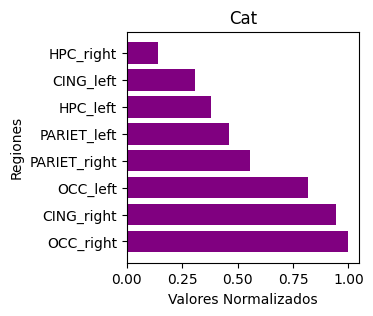

In [5]:
cat_model.plot_normalized_values(resultado_normalizado_sorted, color='purple', name_set='Cat',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


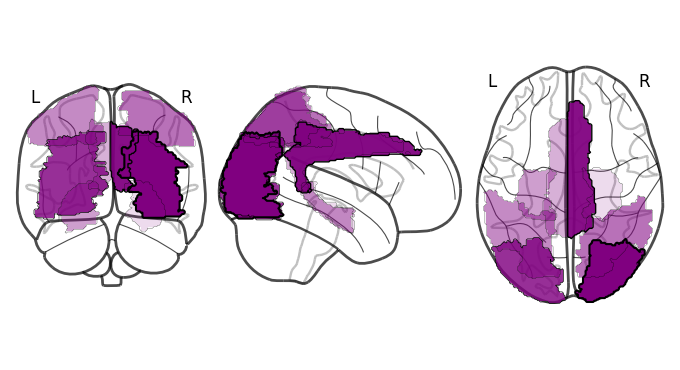

In [6]:
base_path = 'C:/Users/felipe/Documents/brain_age_/cerebritos/'

cat_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='purple')